In [438]:
import pandas as pd
import numpy as np

In [439]:
!git clone https://github.com/Khotso-Bore/Local-Recoding-Anonymization.git


fatal: destination path 'Local-Recoding-Anonymization' already exists and is not an empty directory.


### Prepare Dataset

In [440]:
df = pd.read_csv('/content/Local-Recoding-Anonymization/adult/adult.data', header=None,names=[
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income"
]
 )

In [441]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [442]:
df.dropna(inplace=True)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### drop coloumns

In [444]:
drop_columns = ['capital-gain', 'capital-loss', 'fnlwgt', 'education-num','income']

'''
# Drop unnecessary columns
These columns are dropped as they are not needed as
they may not contain any sensitive information.
required for the local recoding anonymization process.
'''
df.drop(columns=drop_columns, inplace=True)

In [445]:
# count number of columns
print(f"Number of columns after dropping unnecessary columns: {len(df.columns)}")

Number of columns after dropping unnecessary columns: 10


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


In [447]:
print("Sensitive Attribute - workclass value counts:")
df['workclass'].value_counts()

Sensitive Attribute - workclass value counts:


,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [448]:
# Show the first row where 'workclass' contains '?'
missing_value = df[df['workclass'].str.contains('?', regex=False)]['workclass'].head(1).values[0]
print(f"Missing value representation in 'workclass': {missing_value}")

Missing value representation in 'workclass':  ?


In [449]:
df.replace(missing_value,np.nan,inplace=True)
df.dropna(inplace=True)
df['workclass'].value_counts()



,count
workclass,
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14


In [450]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,14065
Never-married,9726
Divorced,4214
Separated,939
Widowed,827
Married-spouse-absent,370
Married-AF-spouse,21


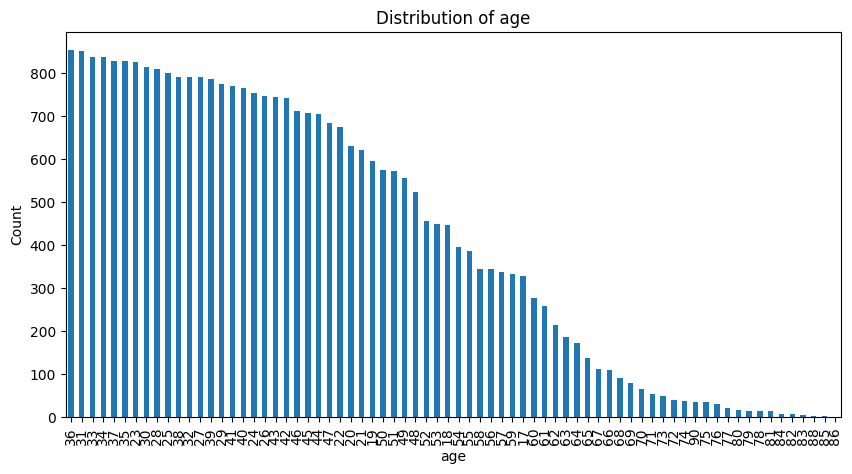

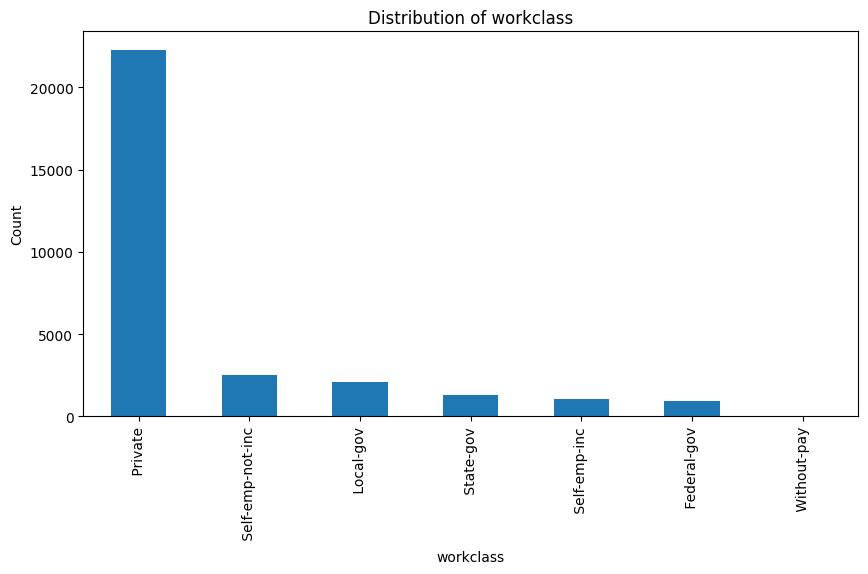

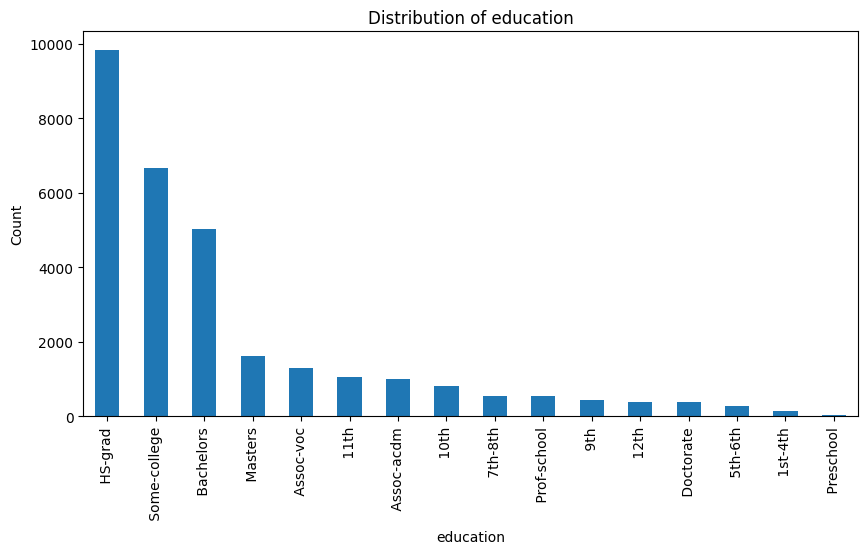

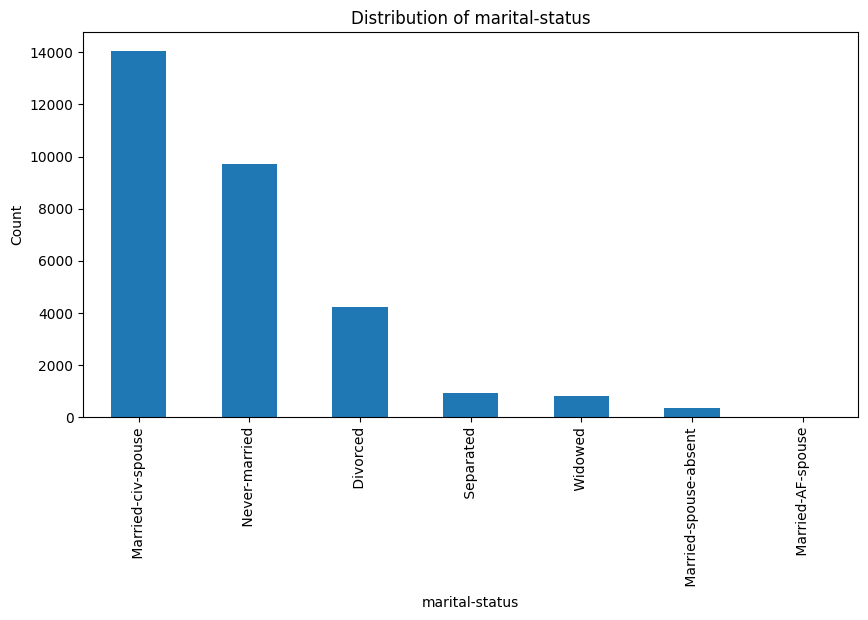

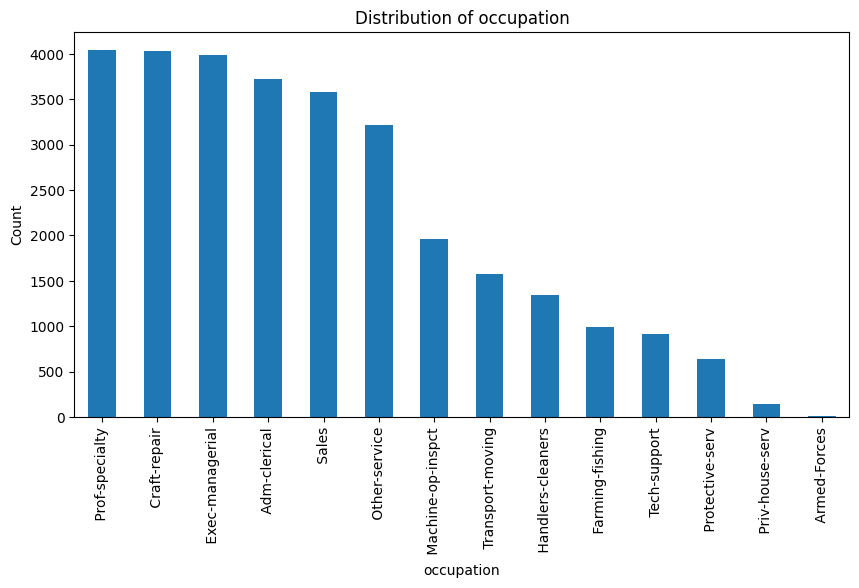

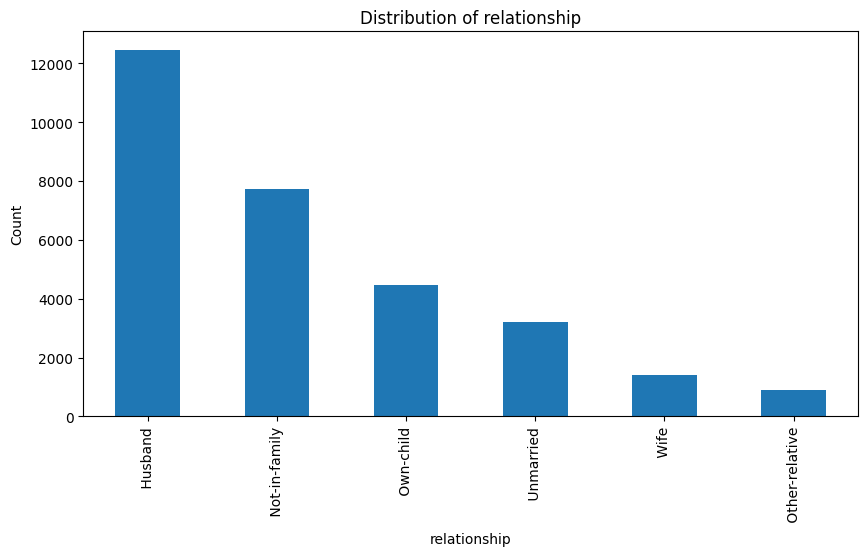

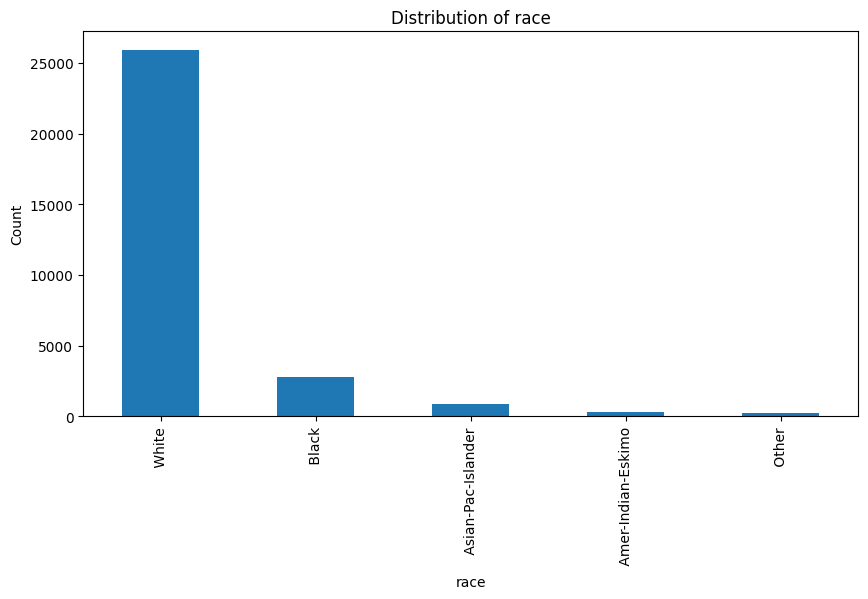

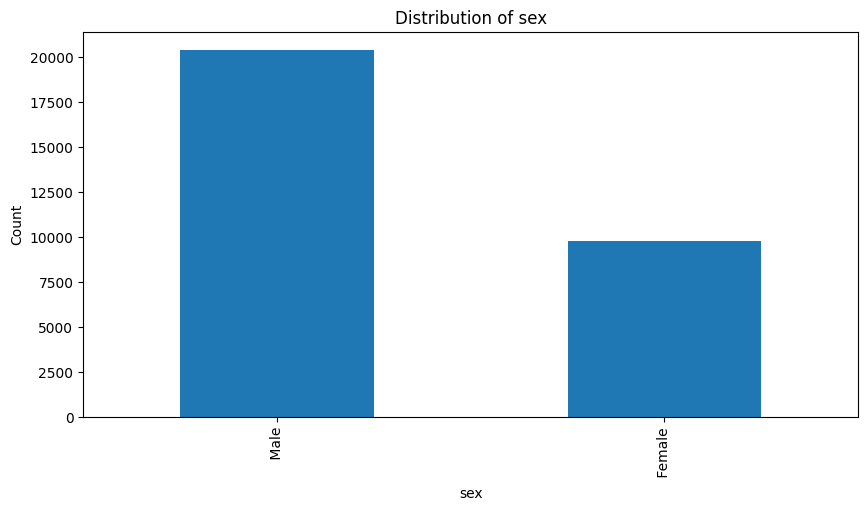

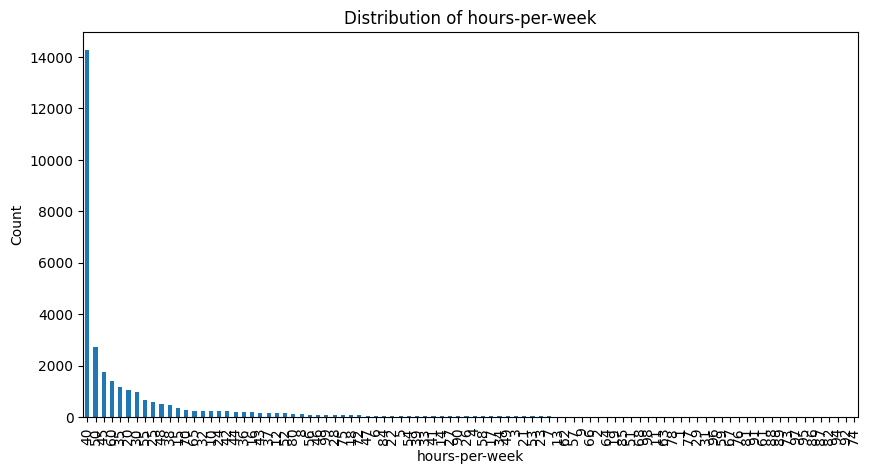

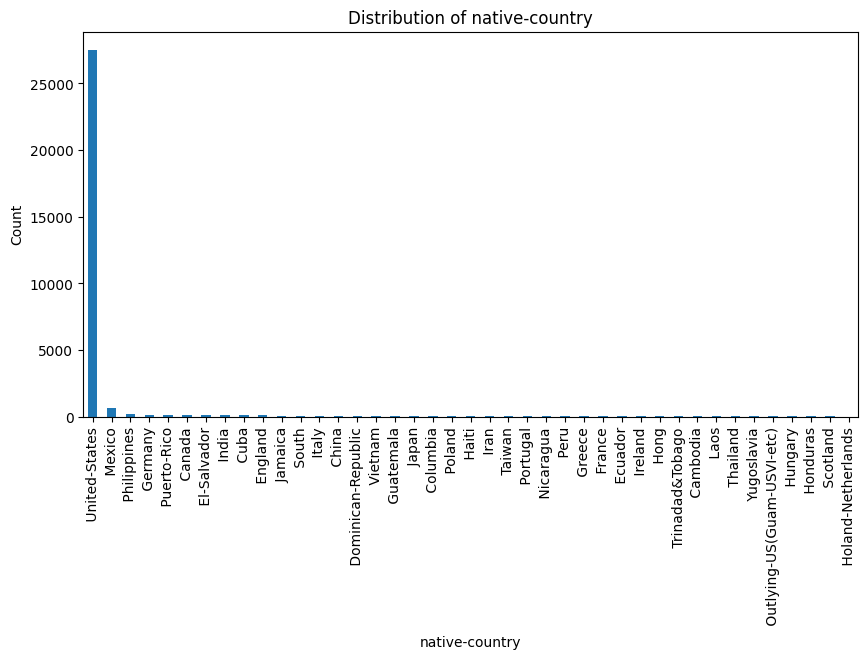

In [451]:
#plot the distribution of every column
import matplotlib.pyplot as plt
for column in df.columns:
    plt.figure(figsize=(10,5))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Algorithm 2

In [453]:
#save unqiq values of each column to as a string array
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique().tolist()
    print(f"Unique values in {column}: {unique_values[column]}")


Unique values in age: [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40, 54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46, 36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60, 90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84, 83, 85, 82, 86]
Unique values in workclass: [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay']
Unique values in education: [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate', ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool', ' 12th', ' 1st-4th']
Unique values in marital-status: [' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
Unique values in occupation: [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving', ' F

In [454]:
import json
import pprint

with open('/content/Local-Recoding-Anonymization/taxonomy-tree.json', 'r') as f:
    taxonomy_dict = json.load(f)

# Display the dictionary
pprint.pprint(taxonomy_dict)

{'education': {'Post-Secondary': {'College': {'Assoc-acdm': ['Assoc-acdm'],
                                              'Assoc-voc': ['Assoc-voc'],
                                              'Some-college': ['Some-college']},
                                  'University': {'Bachelor': ['Bachelors'],
                                                 'Graduate': ['Masters',
                                                              'Doctorate',
                                                              'Prof-school']}},
               'Preschool': {'Preschool': {'Preschool': ['Preschool']}},
               'Primary': {'Lower Primary': {'1st-4th': ['1st-4th']},
                           'Upper Primary': {'5th-6th': ['5th-6th']}},
               'Secondary': {'Junior': {'10th': ['10th'], '9th': ['9th']},
                             'Lower Secondary': {'7th-8th': ['7th-8th']},
                             'Senior': {'11th': ['11th'],
                                        '12t

In [455]:
#invert the taxonomy dictionary to get child to parent mapping
def invert_taxonomy_tree(taxonomy, path=[]):
    inverted_taxonomy_tree = {}
    for key in taxonomy:


        extended_path = [key] + path
        # if(key == "workclass"):
        #     print(taxonomy[key])
        #     print(path)
        # print(f"Current key: {key}, Current path: {path}")
        if isinstance(taxonomy[key], dict):
            result = invert_taxonomy_tree(taxonomy[key], extended_path)
            inverted_taxonomy_tree.update(result)
            # if(key == "workclass"):
            #     print(inverted_taxonomy_tree)

        if isinstance(taxonomy[key], list):
            for item in taxonomy[key]:
                inverted_taxonomy_tree[item] = [item] + extended_path

        # path = []
    return inverted_taxonomy_tree

inverted_taxonomy_tree = invert_taxonomy_tree(taxonomy_dict, [])
for key in inverted_taxonomy_tree:
    print(f"{key}: {inverted_taxonomy_tree[key]}")


Federal-gov: ['Federal-gov', 'Government', 'workclass']
State-gov: ['State-gov', 'Government', 'workclass']
Local-gov: ['Local-gov', 'Government', 'workclass']
Self-emp-inc: ['Self-emp-inc', 'Self-Employed', 'workclass']
Self-emp-not-inc: ['Self-emp-not-inc', 'Self-Employed', 'workclass']
Private: ['Private', 'Private Sector', 'workclass']
Without-pay: ['Without-pay', 'Other', 'workclass']
Preschool: ['Preschool', 'Preschool', 'Preschool', 'Preschool', 'education']
1st-4th: ['1st-4th', '1st-4th', 'Lower Primary', 'Primary', 'education']
5th-6th: ['5th-6th', '5th-6th', 'Upper Primary', 'Primary', 'education']
7th-8th: ['7th-8th', '7th-8th', 'Lower Secondary', 'Secondary', 'education']
9th: ['9th', '9th', 'Junior', 'Secondary', 'education']
10th: ['10th', '10th', 'Junior', 'Secondary', 'education']
11th: ['11th', '11th', 'Senior', 'Secondary', 'education']
12th: ['12th', '12th', 'Senior', 'Secondary', 'education']
HS-grad: ['HS-grad', 'HS-grad', 'Senior', 'Secondary', 'education']
Some-c

## Provenence Set

In [456]:
def provenance(values):
    result = []
    for value in values:
        mapping = inverted_taxonomy_tree.get(value, None)
        if mapping:
            result = result + mapping[:-1]  # Exclude the original value
    return result


In [457]:
df.head(1).values[0]

array([39, ' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical',
       ' Not-in-family', ' White', ' Male', 40, ' United-States'],
      dtype=object)

In [458]:

first_row = list(df.head(1).values[0])
first_row = [s.strip() for s in first_row if isinstance(s, str)]


In [459]:
provenance(first_row)

['State-gov',
 'Government',
 'Bachelors',
 'Bachelor',
 'University',
 'Post-Secondary',
 'Never-married',
 'Single',
 'Adm-clerical',
 'Management & Administration',
 'Not-in-family',
 'Non-Family',
 'White',
 'Male',
 'United-States',
 'North America']

In [460]:
education_tree = {
        "Secondary": {
            "Junior": ["9th", "10th"],
            "Senior": ["11th", "12th"]
        },
        "University": {
            "Bachelor": ["Bachelor"],
            "Graduate": ["Master", "Doctorate"]
        }
}

# education_tree = {
#     "Any_Education": ["hello"]
# }


## Algorith 2 characteristic_vector_converting

In [461]:
def characteristic_vector_converting(taxonomy_tree, values, inverted_taxonomy_tree):
    characteristic_vector = []
    # print(f"Values to process for characteristic vector: {values}")
    for val in values:
        # print(f"Processing value: {val}")
        last_value = inverted_taxonomy_tree[val][-1]
        # print(f"Processing value: {val}, Last value in taxonomy path: {last_value}")
        # Get the values in the inverted taxonomy tree that have key as the last value
        arr = []
        for k in inverted_taxonomy_tree:
            mapping = inverted_taxonomy_tree[k]
            if mapping and mapping[-1] == last_value:
                arr.append(mapping[:-1])  # Exclude the original value

        arr = np.array(arr)
        # print(arr.shape)
        # print(arr)
        # for each column in arr
        # print(arr.shape[1])
        provenance_set = provenance([val])
        for col in range(len(provenance_set)):  # every column except last column
            # Get the unique values in the column
            coloumn_values = arr[:, col]
            unique_values = np.unique(coloumn_values)
            # print(f"Unique values in column {provenance_set[col]}: {unique_values}")
            # print(f"Value to encode: {unique_values[0]}")
            vector = [0] * len(unique_values)
            # print(val)
            index = np.where(unique_values == provenance_set[col])[0][0]
            # print(f"Index of value {val} in unique values: {index}")
            vector[index] = 1
            characteristic_vector.extend(vector)
            # Do something with the vector
    return characteristic_vector


In [462]:
first_row[-2:]

['Male', 'United-States']

In [463]:
characteristic_vector_converting(taxonomy_dict, first_row, inverted_taxonomy_tree)

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1]

# Experiment parameters

In [464]:
import random

In [465]:
# k=??
# theta=??
alpha=10

# Creating set of hash functions (universal use)

In [466]:

# creates set F of hash functions Hash functions in F are in
#  the form of h(x)=(ax+b) mod NPrime, where a and b are
#  random integers, and NPrime is the smallest prime number
#  larger than |U|.

# F is a list of hash functions
# Each hash function h takes an input x (row index in the characteristic vector)
# and outputs a hashed value modulo a large prime number.
# Example: h(x) = (a * x + b) % N_prime
U=len(characteristic_vector_converting(taxonomy_dict, first_row, inverted_taxonomy_tree))
random.seed(42)
def create_hash_fam(num_hashes,U_size):
  def is_prime(n):
    if n<2:
      return False

    for i in range(2,int(n**0.5)+1):
      if n%i==0:
        return False
    return True

  def next_prime(n):
    while not is_prime(n):
      n=n+1
    return n

  N_prime=next_prime(U_size +1)

  F=[]

  for i in range(num_hashes):
    a=random.randint(1,N_prime-1)
    b=random.randint(0,N_prime-1)
    h = lambda x, a=a, b=b, N_prime=N_prime: (a * x + b) % N_prime
    F.append(h)
  return F
F = create_hash_fam(num_hashes=alpha, U_size=U)

# Algorithm 4

In [467]:
import random

In [468]:
from math import inf
###ALGORITHM 4
def minhash(characteristic_vec,h_ab):
  min_hash=float('inf')
  for i,bit in enumerate(characteristic_vec):
      if bit==1:
        index=h_ab(i+1)
        if index<min_hash:
          min_hash=index

  return min_hash


In [469]:
# testing algo 4
# h_ab=F[random.randint(0,len(F)-1)]
characteristic_vec_eg=characteristic_vector_converting(taxonomy_dict, first_row, inverted_taxonomy_tree)
second_row = list(df.values[100])
second_row = [s.strip() for s in second_row if isinstance(s, str)]
vec1=characteristic_vector_converting(taxonomy_dict, first_row, inverted_taxonomy_tree)
vec2=characteristic_vector_converting(taxonomy_dict, second_row, inverted_taxonomy_tree)
min_hash1_val = minhash(vec1,F[2])
min_hash2_val= minhash(vec2,F[2])

print(min_hash1_val,min_hash2_val)

22 5


## TAXONOMY Helper funcs

In [470]:
# find the least common ancestor
def find_lca(v1, v2, inverted_taxonomy_tree):
  if v1 == v2:
    return v1

# get paths for both values
  path1 = inverted_taxonomy_tree.get(v1, [])
  path2 = inverted_taxonomy_tree.get(v2, [])

  if not path1 or not path2:
    return None #different attributes have no common ancestor

  if path1[-1] != path2[-1]:
    return None

  # compare paths to find the lca"
  lca = None
  min_len = min(len(path1), len(path2))

  for i in range(1, min_len):
    idx = -i - 1
    if path1[idx] == path2[idx]:
      lca = path1[idx]
    else:
      break

  return lca

def get_tree_height(attr_name, inverted_taxonomy_tree):

  max_height = 0

  for value, path in inverted_taxonomy_tree.items():
        # Check if this value belongs to the attribute
      if path and path[-1] == attr_name:
            # Height = length of path minus 1 (exclude attribute name root)
          height = len(path) - 1
          max_height = max(max_height, height)

  return max_height

def path_length_between(v1, v2, inverted_taxonomy_tree):

    if v1 == v2:
        return 0

    lca = find_lca(v1, v2, inverted_taxonomy_tree)

    if lca is None:
        # No common ancestor meaning different attributes or invalid
        return float('inf')

    path1 = inverted_taxonomy_tree.get(v1, [])
    path2 = inverted_taxonomy_tree.get(v2, [])

    # Find distance from v1 to LCA
    # Count steps from v1 (index 0) to LCA
    try:
        lca_index_in_path1 = path1.index(lca)
        dist1 = lca_index_in_path1
    except ValueError:
        dist1 = 0

    # distance from v2 to LCA
    try:
        lca_index_in_path2 = path2.index(lca)
        dist2 = lca_index_in_path2
    except ValueError:
        dist2 = 0

    # Total path length
    L = dist1 + dist2

    return L




In [471]:
# confirmations

v1 = "State-gov"
v2 = "Federal-gov"
lca = find_lca(v1, v2, inverted_taxonomy_tree)
print(f"LCA of '{v1}' and '{v2}': {lca}")
print(f"Expected: 'Government'")
print(f"Path1: {inverted_taxonomy_tree[v1]}")
print(f"Path2: {inverted_taxonomy_tree[v2]}")

v1 = "State-gov"
v2 = "Private"
lca = find_lca(v1, v2, inverted_taxonomy_tree)
print(f"\nLCA of '{v1}' and '{v2}': {lca}")
print(f"Expected: 'workclass' ")
print(f"Path1: {inverted_taxonomy_tree[v1]}")
print(f"Path2: {inverted_taxonomy_tree[v2]}")

LCA of 'State-gov' and 'Federal-gov': Government
Expected: 'Government'
Path1: ['State-gov', 'Government', 'workclass']
Path2: ['Federal-gov', 'Government', 'workclass']

LCA of 'State-gov' and 'Private': None
Expected: 'workclass' 
Path1: ['State-gov', 'Government', 'workclass']
Path2: ['Private', 'Private Sector', 'workclass']


In [472]:
v1 = "Masters"
v2 = "Doctorate"
lca = find_lca(v1, v2, inverted_taxonomy_tree)
print(f"LCA of '{v1}' and '{v2}': {lca}")
print(f"Expected: 'Graduate'")
print(f"Path1: {inverted_taxonomy_tree[v1]}")
print(f"Path2: {inverted_taxonomy_tree[v2]}")

v1 = "Masters"
v2 = "Bachelors"
lca = find_lca(v1, v2, inverted_taxonomy_tree)
print(f"\nLCA of '{v1}' and '{v2}': {lca}")
print(f"Expected: 'University'")
print(f"Path1: {inverted_taxonomy_tree[v1]}")
print(f"Path2: {inverted_taxonomy_tree[v2]}")

v1 = "Masters"
v2 = "HS-grad"
lca = find_lca(v1, v2, inverted_taxonomy_tree)
print(f"\nLCA of '{v1}' and '{v2}': {lca}")
print(f"Expected: 'education' or 'Post-Secondary' and 'Secondary' common parent")
print(f"Path1: {inverted_taxonomy_tree[v1]}")
print(f"Path2: {inverted_taxonomy_tree[v2]}")

LCA of 'Masters' and 'Doctorate': Graduate
Expected: 'Graduate'
Path1: ['Masters', 'Graduate', 'University', 'Post-Secondary', 'education']
Path2: ['Doctorate', 'Graduate', 'University', 'Post-Secondary', 'education']

LCA of 'Masters' and 'Bachelors': University
Expected: 'University'
Path1: ['Masters', 'Graduate', 'University', 'Post-Secondary', 'education']
Path2: ['Bachelors', 'Bachelor', 'University', 'Post-Secondary', 'education']

LCA of 'Masters' and 'HS-grad': None
Expected: 'education' or 'Post-Secondary' and 'Secondary' common parent
Path1: ['Masters', 'Graduate', 'University', 'Post-Secondary', 'education']
Path2: ['HS-grad', 'HS-grad', 'Senior', 'Secondary', 'education']


In [473]:
# tree height

for attr in ['workclass', 'education', 'sex', 'race', 'marital-status', 'occupation']:
    height = get_tree_height(attr, inverted_taxonomy_tree)
    print(f"Height of '{attr}' taxonomy tree: {height}")

Height of 'workclass' taxonomy tree: 2
Height of 'education' taxonomy tree: 4
Height of 'sex' taxonomy tree: 1
Height of 'race' taxonomy tree: 1
Height of 'marital-status' taxonomy tree: 2
Height of 'occupation' taxonomy tree: 2


In [474]:
# Same values
v1 = "Masters"
v2 = "Masters"
L = path_length_between(v1, v2, inverted_taxonomy_tree)
print(f"Path length between '{v1}' and '{v2}': {L}")
print(f"Expected: 0 (same value)")

Path length between 'Masters' and 'Masters': 0
Expected: 0 (same value)


In [475]:
# too far apart
v1 = "Masters"
v2 = "HS-grad"
L = path_length_between(v1, v2, inverted_taxonomy_tree)
print(f"\nPath length between '{v1}' and '{v2}': {L}")
print(f"Path1: {inverted_taxonomy_tree[v1]}")
print(f"Path2: {inverted_taxonomy_tree[v2]}")


Path length between 'Masters' and 'HS-grad': inf
Path1: ['Masters', 'Graduate', 'University', 'Post-Secondary', 'education']
Path2: ['HS-grad', 'HS-grad', 'Senior', 'Secondary', 'education']


# Distance

In [476]:
def categorical_distance(v1, v2, attr_name, inverted_taxonomy_tree):
    """
    Equation (5): Path-based distance between two categorical values
    d(v, v') = L(v, v') / (2H)

    """
    if v1 == v2:
        return 0.0

    # Get path length L(v1, v2)
    L = path_length_between(v1, v2, inverted_taxonomy_tree)

    if L == float('inf'):
        return 1.0

    # Get tree height H
    H = get_tree_height(attr_name, inverted_taxonomy_tree)

    if H == 0:
        return 0.0

    # Return normalized distance
    distance = L / (2.0 * H)

    return distance


def qid_distance(qid1, qid2, attr_names, inverted_taxonomy_tree, weights=None):
    """
    Equation (6): Distance between two quasi-identifiers (records)
    d(qid, qid') = Σ(ωᵢ × d(vᵢ, v'ᵢ))

    """
    m = len(qid1)

    if weights is None:
        weights = [1.0 / m] * m

    total_distance = 0.0

    for i in range(m):
        # Calculate distance for this attribute
        cat_dist = categorical_distance(
            qid1[i],
            qid2[i],
            attr_names[i],
            inverted_taxonomy_tree
        )
        total_distance += weights[i] * cat_dist

    return total_distance


def cluster_distance(cluster1, cluster2, k, attr_names, inverted_taxonomy_tree, theta=None):
    """
    Equation (8): Flexible distance between two clusters
    d(C, C') = (θ × Δ + 1) × max{d(qid, qid')}
    where Δ = |C| + |C'| - k

    """
    if theta is None:
        theta = 1.0 / k

    # Calculate Δ (delta)
    delta = len(cluster1) + len(cluster2) - k

    # Find maximum pairwise distance (diameter of merged cluster)
    max_distance = 0.0
    for qid1 in cluster1.records:
        for qid2 in cluster2.records:
            dist = qid_distance(qid1, qid2, attr_names, inverted_taxonomy_tree)
            max_distance = max(max_distance, dist)

    # Apply flexible distance formula
    flexible_distance = (theta * delta + 1) * max_distance

    return flexible_distance

In [477]:
print("TEST 2: DISTANCE FUNCTIONS")

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']

# Get first two records
record1 = df[categorical_cols].iloc[0].tolist()
record2 = df[categorical_cols].iloc[1].tolist()

# Strip whitespace
record1 = [s.strip() if isinstance(s, str) else s for s in record1]
record2 = [s.strip() if isinstance(s, str) else s for s in record2]

print("\n[Test 2.1] Categorical Distance")
print("-" * 50)
print(f"Record 1 workclass: {record1[0]}")
print(f"Record 2 workclass: {record2[0]}")

dist = categorical_distance(record1[0], record2[0], 'workclass', inverted_taxonomy_tree)
print(f"Categorical distance: {dist:.4f}")

print(f"\nRecord 1 education: {record1[1]}")
print(f"Record 2 education: {record2[1]}")
dist = categorical_distance(record1[1], record2[1], 'education', inverted_taxonomy_tree)
print(f"Categorical distance: {dist:.4f}")

print("\n[Test 2.2] QID Distance")
print("-" * 50)
print(f"Record 1: {record1}")
print(f"Record 2: {record2}")
dist = qid_distance(record1, record2, categorical_cols, inverted_taxonomy_tree)
print(f"QID distance: {dist:.4f}")

TEST 2: DISTANCE FUNCTIONS

[Test 2.1] Categorical Distance
--------------------------------------------------
Record 1 workclass: State-gov
Record 2 workclass: Self-emp-not-inc
Categorical distance: 1.0000

Record 1 education: Bachelors
Record 2 education: Bachelors
Categorical distance: 0.0000

[Test 2.2] QID Distance
--------------------------------------------------
Record 1: ['State-gov', 'Bachelors', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 'United-States']
Record 2: ['Self-emp-not-inc', 'Bachelors', 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 'United-States']
QID distance: 0.4375


In [478]:
class Cluster:
    """
    Represents a cluster of quasi-identifiers (data records)
    """

    def __init__(self, records):

        self.records = records

    def __len__(self):
        # Return number of records in cluster
        return len(self.records)

    def merge(self, other_cluster):

        # Merge two clusters into one

        return Cluster(self.records + other_cluster.records)

    def __repr__(self):
        return f"Cluster(size={len(self.records)})"

In [479]:
print("TEST 3: CLUSTER CLASS")


# Create test clusters
records1 = [record1, record2]
records2 = df[categorical_cols].iloc[2:4].values.tolist()
records2 = [[s.strip() if isinstance(s, str) else s for s in rec] for rec in records2]

cluster1 = Cluster(records1)
cluster2 = Cluster(records2)

print(f"\nCluster 1: {cluster1}")
print(f"  Records: {len(cluster1.records)}")

print(f"\nCluster 2: {cluster2}")
print(f"  Records: {len(cluster2.records)}")

# Test merge
merged = cluster1.merge(cluster2)
print(f"\nMerged cluster: {merged}")
print(f"  Records: {len(merged.records)}")
print(f"Expected: 4 records")

TEST 3: CLUSTER CLASS

Cluster 1: Cluster(size=2)
  Records: 2

Cluster 2: Cluster(size=2)
  Records: 2

Merged cluster: Cluster(size=4)
  Records: 4
Expected: 4 records


In [480]:
import heapq

def beta_ac(small_clusters, k, attr_names, inverted_taxonomy_tree, theta=None):
    """
    Algorithm 6: Beta-cluster based Agglomerative Clustering

    """
    if theta is None:
        theta = 1.0 / k
    k_member_clusters = []
    remaining_cluster = None

    active_clusters = {i: cluster for i, cluster in enumerate(small_clusters)}

    pqueue = []

    cluster_ids = list(active_clusters.keys())
    for i in range(len(cluster_ids)):
        for j in range(i + 1, len(cluster_ids)):
            id1, id2 = cluster_ids[i], cluster_ids[j]
            dist = cluster_distance(
                active_clusters[id1],
                active_clusters[id2],
                k,
                attr_names,
                inverted_taxonomy_tree,
                theta
            )
            heapq.heappush(pqueue, (dist, id1, id2))

    next_id = max(active_clusters.keys()) + 1 if active_clusters else 0

    # Main merging loop
    while pqueue:
        # Extract pair with minimum distance
        dist, id_x, id_y = heapq.heappop(pqueue)

        # Skip if either cluster was already merged (no longer active)
        if id_x not in active_clusters or id_y not in active_clusters:
            continue

        # Get the two clusters and merge them
        cluster_x = active_clusters[id_x]
        cluster_y = active_clusters[id_y]
        cluster_z = cluster_x.merge(cluster_y)

        del active_clusters[id_x]
        del active_clusters[id_y]


        if len(cluster_z) >= k:
            k_member_clusters.append(cluster_z)
        else:
            new_id = next_id
            next_id += 1
            active_clusters[new_id] = cluster_z

            for other_id, other_cluster in active_clusters.items():
                if other_id != new_id:
                    new_dist = cluster_distance(
                        cluster_z,
                        other_cluster,
                        k,
                        attr_names,
                        inverted_taxonomy_tree,
                        theta
                    )
                    heapq.heappush(pqueue, (new_dist, new_id, other_id))

    if len(active_clusters) == 1:
        remaining_id = list(active_clusters.keys())[0]
        remaining_cluster = active_clusters[remaining_id]

    return k_member_clusters, remaining_cluster

In [481]:
print("TEST 4: ALGORITHM 6 - BETA-AC")

# Prepare small clusters
k = 5
n_records = 20

sample_data = df[categorical_cols].iloc[:n_records].values.tolist()
sample_data = [[s.strip() if isinstance(s, str) else s for s in rec] for rec in sample_data]

# small clusters (each < k)
small_clusters = []
cluster_size = 2  # Each initial cluster has 2 records

for i in range(0, n_records, cluster_size):
    records = sample_data[i:i+cluster_size]
    if records:
        small_clusters.append(Cluster(records))

print(f"\n[Input]")
print(f"k = {k}")
print(f"Number of small clusters: {len(small_clusters)}")
print(f"Small cluster sizes: {[len(c) for c in small_clusters]}")

k_member_clusters, remaining_cluster = beta_ac(
    small_clusters,
    k,
    categorical_cols,
    inverted_taxonomy_tree
)

print(f"\n[Output]")
print(f"Number of k-member clusters: {len(k_member_clusters)}")
print(f"k-member cluster sizes: {[len(c) for c in k_member_clusters]}")

if remaining_cluster:
    print(f"Remaining cluster size: {len(remaining_cluster)}")
else:
    print(f"No remaining cluster")

# Verify constraints
print(f"\n[Verification]")
all_valid = True
for i, cluster in enumerate(k_member_clusters):
    size = len(cluster)
    is_valid = k <= size <= 2*k - 1
    print(f"Cluster {i}: size={size}, valid={is_valid} (should be {k} <= size <= {2*k-1})")
    if not is_valid:
        all_valid = False

if remaining_cluster and len(remaining_cluster) >= k:
    print(f"WARNING: Remaining cluster has size >= k!")
    all_valid = False

print(f"\nAll constraints satisfied: {all_valid}")

# Check total records preserved
total_input = sum(len(c) for c in small_clusters)
total_output = sum(len(c) for c in k_member_clusters)
if remaining_cluster:
    total_output += len(remaining_cluster)

print(f"\nRecords in: {total_input}")
print(f"Records out: {total_output}")
print(f"All records preserved: {total_input == total_output}")

TEST 4: ALGORITHM 6 - BETA-AC

[Input]
k = 5
Number of small clusters: 10
Small cluster sizes: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

[Output]
Number of k-member clusters: 2
k-member cluster sizes: [8, 8]
Remaining cluster size: 4

[Verification]
Cluster 0: size=8, valid=True (should be 5 <= size <= 9)
Cluster 1: size=8, valid=True (should be 5 <= size <= 9)

All constraints satisfied: True

Records in: 20
Records out: 20
All records preserved: True


In [482]:
def run_all_tests():

    print("ALGORITHM 6 - COMPLETE TEST SUITE")

    # Setup
    categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country']

    # Test 1: Helper Functions
    print("\n" + "=" * 70)
    print("TEST 1: HELPER FUNCTIONS")
    print("=" * 70)

    lca = find_lca("Masters", "Doctorate", inverted_taxonomy_tree)
    print(f" LCA('Masters', 'Doctorate'): {lca}")

    height = get_tree_height("education", inverted_taxonomy_tree)
    print(f" Tree height for 'education': {height}")

    L = path_length_between("Masters", "Bachelors", inverted_taxonomy_tree)
    print(f" Path length between 'Masters' and 'Bachelors': {L}")

    # Test 2: Distance Functions
    print("\n" + "=" * 70)
    print("TEST 2: DISTANCE FUNCTIONS")
    print("=" * 70)

    record1 = df[categorical_cols].iloc[0].tolist()
    record2 = df[categorical_cols].iloc[1].tolist()
    record1 = [s.strip() if isinstance(s, str) else s for s in record1]
    record2 = [s.strip() if isinstance(s, str) else s for s in record2]

    cat_dist = categorical_distance(record1[1], record2[1], 'education', inverted_taxonomy_tree)
    print(f" Categorical distance: {cat_dist:.4f}")

    qid_dist = qid_distance(record1, record2, categorical_cols, inverted_taxonomy_tree)
    print(f" QID distance: {qid_dist:.4f}")

    cluster1 = Cluster([record1])
    cluster2 = Cluster([record2])
    clust_dist = cluster_distance(cluster1, cluster2, 5, categorical_cols, inverted_taxonomy_tree)
    print(f" Cluster distance: {clust_dist:.4f}")

    # Test 3: Algorithm 6
    print("\n" + "=" * 70)
    print("TEST 3: ALGORITHM 6")
    print("=" * 70)

    k = 5
    n_records = 20
    sample_data = df[categorical_cols].iloc[:n_records].values.tolist()
    sample_data = [[s.strip() if isinstance(s, str) else s for s in rec] for rec in sample_data]

    small_clusters = []
    for i in range(0, n_records, 2):
        records = sample_data[i:i+2]
        if records:
            small_clusters.append(Cluster(records))

    print(f"Input: {len(small_clusters)} small clusters (sizes: {[len(c) for c in small_clusters]})")

    k_member_clusters, remaining_cluster = beta_ac(
        small_clusters,
        k,
        categorical_cols,
        inverted_taxonomy_tree
    )

    print(f"Output: {len(k_member_clusters)} k-member clusters")
    print(f"Cluster sizes: {[len(c) for c in k_member_clusters]}")

    if remaining_cluster:
        print(f"Remaining: {len(remaining_cluster)} records")

    # Verification
    all_valid = all(k <= len(c) <= 2*k-1 for c in k_member_clusters)
    total_in = sum(len(c) for c in small_clusters)
    total_out = sum(len(c) for c in k_member_clusters) + (len(remaining_cluster) if remaining_cluster else 0)

    print(f"\nAll size constraints satisfied: {all_valid}")
    print(f" All records preserved: {total_in == total_out} ({total_in} in, {total_out} out)")

run_all_tests()

ALGORITHM 6 - COMPLETE TEST SUITE

TEST 1: HELPER FUNCTIONS
 LCA('Masters', 'Doctorate'): Graduate
 Tree height for 'education': 4
 Path length between 'Masters' and 'Bachelors': 4

TEST 2: DISTANCE FUNCTIONS
 Categorical distance: 0.0000
 QID distance: 0.4375
 Cluster distance: 0.1750

TEST 3: ALGORITHM 6
Input: 10 small clusters (sizes: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Output: 2 k-member clusters
Cluster sizes: [8, 8]
Remaining: 4 records

All size constraints satisfied: True
 All records preserved: True (20 in, 20 out)


In [483]:
# Example: Anonymizing a subset of our Adult dataset

# 1. Prepare data
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']

# 2. Get records
n_records = 100
sample_data = df[categorical_cols].iloc[:n_records].values.tolist()
sample_data = [[s.strip() if isinstance(s, str) else s for s in rec] for rec in sample_data]

# 3. Create initial small clusters (simulate output from LSH partitioning)
# In real implementation, these would come from Algorithm 5
small_cluster_size = 3
small_clusters = []
for i in range(0, len(sample_data), small_cluster_size):
    records = sample_data[i:i+small_cluster_size]
    if records:
        small_clusters.append(Cluster(records))

# 4. Set parameters
k = 10  # k-anonymity parameter
theta = 1.0 / k  # Weight parameter

# 5. Run Algorithm 6
print(f"Running Beta-AC with k={k} on {len(small_clusters)} small clusters...")
k_member_clusters, remaining_cluster = beta_ac(
    small_clusters,
    k,
    categorical_cols,
    inverted_taxonomy_tree,
    theta
)

# 6. Results
print(f"\nResults:")
print(f"  k-member clusters: {len(k_member_clusters)}")
print(f"  Cluster sizes: {[len(c) for c in k_member_clusters]}")
if remaining_cluster:
    print(f"  Remaining records: {len(remaining_cluster)}")

Running Beta-AC with k=10 on 34 small clusters...

Results:
  k-member clusters: 8
  Cluster sizes: [12, 12, 12, 12, 12, 12, 13, 15]


# Algorithm 1

In [485]:
def lsh_local_recoding(dataset,k,alpha):
  records_with_metadata=[]
  dataset_anon=pd.DataFrame(columns=df.columns)
  for idx, row in dataset.iterrows():
        # Extract quasi-identifier values
        qid_values = row[categorical_cols].tolist()
        qid_values = [s.strip() if isinstance(s, str) else s for s in qid_values]

        binary_vector = characteristic_vector_converting(taxonomy_dict,qid_values,inverted_taxonomy_tree)

        records_with_metadata.append({
            'record_id': idx,
            'qid_values': qid_values,
            'binary_vector': binary_vector,
            'original_row': row  # Keep full original row
        })

  print(f"Converted {len(records_with_metadata)} records to binary vectors")
    # print(dataset_anon.head())

In [436]:
lsh_local_recoding(df,5,1)

Converted 30162 records to binary vectors


In [437]:
df.shape

(30162, 10)